# Principal Component Analysis (PCA)

**Principal Component Analysis (PCA)** is a statistical technique used to reduce the dimensionality of large datasets, enhancing interpretability while minimizing information loss. It achieves this by identifying the most significant directions, or principal components, along which the data varies.

## Overview and Mathematical Foundation

PCA transforms data into a new coordinate system such that the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. This is achieved through:

1. **Standardization**: Each feature is standardized to have zero mean and unit variance:
   $$ z = \frac{x - \text{mean}}{\text{standard deviation}} $$

2. **Covariance Matrix and Eigendecomposition**: After standardization, the covariance matrix is computed as:
   $$ S = \frac{1}{n-1}AA^T $$
   Here, $A$ is the data matrix with standardized values. PCA then involves calculating the eigenvectors and eigenvalues of this covariance matrix to identify the principal components.

3. **Data Projection**: The data are projected onto the space spanned by the selected principal components, reducing dimensions while trying to preserve the variability present in the original data:
   $$ A_{\text{proj}} = A [\text{PC}_1, \text{PC}_2] $$

The eigenvectors (principal components) define the new axes, whereas the eigenvalues indicate how much variance is captured by each principal component. The squared singular values from the SVD of $A$, divided by the total variance, give the proportion of variance explained by each principal component:
$$ \text{Variance Explained} = \frac{\sigma_{i}^{2}}{\sum_{j} \sigma_{j}^{2}} $$

## Conclusion

PCA is invaluable in exploratory data analysis, pattern recognition, and making predictive models more efficient. By focusing on the components with the highest variances, PCA provides a powerful tool for analyzing data with many variables, revealing the underlying structure of the data and making the data easier to visualize.


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('salary.csv')

# Drop non-numeric or unnecessary columns
df = df.drop(columns=['Player Name', 'Position', 'Team', 'Unnamed: 0'])

# Handle missing values by replacing them with the mean of each column
df.fillna(df.mean(), inplace=True)

# Scale the data to normalize feature scales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_  # Make sure to store cluster labels in the DataFrame

# Initialize PCA and reduce dimension to two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = df['Cluster']  # Attach cluster labels to the PCA results

# Explaining variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by component: {explained_variance}")
print(f"Total variance explained by 2 components: {explained_variance.sum() * 100:.2f}%")


Explained variance by component: [0.39247785 0.14500354]
Total variance explained by 2 components: 53.75%


The first two principal components explain approximately 53.75% of the variance in the data. This level of explained variance indicates that while the two principal components capture more than half of the data's variability, a significant portion of the variance remains in other dimensions that are not captured in this 2D projection. The first component explains 39.25%, which is substantial, suggesting it captures a major underlying pattern or factor in the dataset. The second component accounts for 14.50%, which is considerably less but still meaningful, indicating it captures additional nuances in the data.

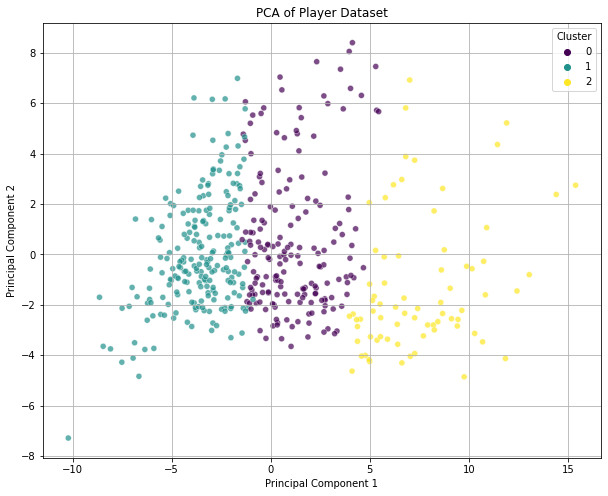

In [4]:
# Plotting the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA of Player Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Cluster 0 (Purple)**: This cluster is densely packed and mostly central in the plot, suggesting that these data points are similar across the main components of variance and might represent a "general" group in the dataset with average values across most features.\
**Cluster 1 (Teal)**: The distribution of this cluster is slightly more spread out than Cluster 0, particularly along the first principal component. This indicates variability within the cluster concerning the dominant pattern captured by the first component, possibly representing players with a specific standout feature or set of features that distinguish them slightly from the average.\
**Cluster 2 (Yellow)**: This cluster is the most dispersed and is spread primarily along the second principal component. The spread along the second principal component suggests that this group varies more in the secondary patterns of the data. This cluster may contain players who are outliers in certain statistics not as strongly correlated with the main variance.